In [31]:
import datetime
from datetime import datetime
import pandas as pd
import matplotlib.pylab as plt
from matplotlib import pyplot
import seaborn as sns
%matplotlib inline 

In [35]:
today_date=datetime.now()
#filename = "https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide-"+today_date.strftime('%Y')+"-"+today_date.strftime('%m')+"-"+today_date.strftime('%d')+ ".xlsx"
filename ="https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide-2020-03-26.xlsx"
df=pd.read_excel(filename)

In [36]:
df_cn_1=df.loc[df["GeoId"]=='CN']
df_cn_C = df_cn_1.sort_values('DateRep')

df_cn_C['T_Cases'] = df_cn_C['Cases'].cumsum()
df_cn_C['T_Deaths'] = df_cn_C['Deaths'].cumsum()
df_cn_C['per_death']=df_cn_C['T_Deaths']/df_cn_C['T_Cases']

df_cn_C = df_cn_C.reset_index(drop=True)


In [37]:
df_it_P=df.loc[df["GeoId"]=='IT']
df_it_P1 = df_it_P.sort_values('DateRep')

df_it_P1['T_Cases'] = df_it_P1['Cases'].cumsum()
df_it_P1['T_Deaths'] = df_it_P1['Deaths'].cumsum()
df_it_P1['per_death']=df_it_P1['T_Deaths']/df_it_P1['T_Cases']

df_it_P1 = df_it_P1.reset_index(drop=True)

In [38]:
df_uk_P=df.loc[df["GeoId"]=='UK']
df_uk_P1 = df_uk_P.sort_values('DateRep')

df_uk_P1['T_Cases'] = df_uk_P1['Cases'].cumsum()
df_uk_P1['T_Deaths'] = df_uk_P1['Deaths'].cumsum()
df_uk_P1['per_death']=df_uk_P1['T_Deaths']/df_uk_P1['T_Cases']

df_uk_P1 = df_uk_P1.reset_index(drop=True)

In [39]:
df_us_P=df.loc[df["GeoId"]=='US']
df_us_P1 = df_us_P.sort_values('DateRep')

df_us_P1['T_Cases'] = df_us_P1['Cases'].cumsum()
df_us_P1['T_Deaths'] = df_us_P1['Deaths'].cumsum()
df_us_P1['per_death']=df_us_P1['T_Deaths']/df_us_P1['T_Cases']

df_us_P1 = df_us_P1.reset_index(drop=True)

In [40]:
df_all_P=df.loc[df["GeoId"]!='CN']
df_all_P.drop(['Countries and territories','Day','Month','Year','GeoId','Pop_Data.2018'], axis=1, inplace=True)
df_all_P1=df_all_P.groupby(['DateRep'])['Cases', 'Deaths'].sum()

df_all_P2 = df_all_P1.sort_values('DateRep')

df_all_P2['T_Cases'] = df_all_P2['Cases'].cumsum()
df_all_P2['T_Deaths'] = df_all_P2['Deaths'].cumsum()
df_all_P2['per_death']=df_all_P2['T_Deaths']/df_all_P2['T_Cases']

df_all_P2 = df_all_P2.reset_index(drop=True)

df_all_P2

/Users/michal/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/Users/michal/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


,Cases,Deaths,T_Cases,T_Deaths,per_death
0,0,0,0,0,NaN
1,0,0,0,0,NaN
2,0,0,0,0,NaN
3,0,0,0,0,NaN
4,0,0,0,0,NaN
...,...,...,...,...,...
82,33946,1684,223771,9674,0.043232
83,32878,1651,256649,11325,0.044126
84,39716,1757,296365,13082,0.044142
85,38849,2196,335214,15278,0.045577


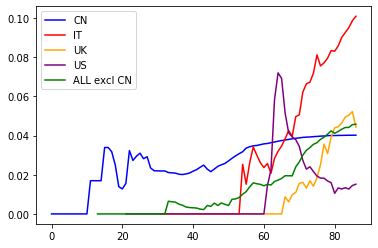

In [41]:
x1 = df_cn_C.index
y1 = df_cn_C['per_death']
x2 = df_it_P1.index
y2 = df_it_P1['per_death']
x3 = df_uk_P1.index
y3 = df_uk_P1['per_death']
x4 = df_us_P1.index
y4 = df_us_P1['per_death']
x5 = df_all_P2.index
y5 = df_all_P2['per_death']

plt.plot(x1,y1, color='blue', label='CN')
plt.plot(x2,y2, color='red', label='IT')
plt.plot(x3,y3, color='orange', label='UK')
plt.plot(x4,y4, color='purple', label='US')
plt.plot(x5,y5, color='green', label='ALL excl CN')
plt.legend()